# Exploración inicial de Data (Proyecto Final - "DesafÍA la IA" Predicción de rotación de clientes (Churn) en una empresa de Telecomunicaciones)

**Descrpción:** En este notebook está contemplada la etapa de exploración inicial de la Data suministrada "Telco Customer Churn".  
**Autor:** Erik González Molina

## 1. Importanción de Librerías

In [106]:
# Importamos librerías necesarias para el análisis y visualización de datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importamos librerías necesarias para la carga de Data desde la página origen
import os
import kagglehub
import shutil

## 2. Descargar Data automáticamente de la página Kaggle.


In [107]:
# Descargar el último dataset disponible
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
# Imprimir el path donde se encuentra el dataset descargado
print("Path to dataset files:", path)
# Especificar la carpeta de destino donde guardar el archivo
folder = '../Data'
# Lista de archivos descargados en la carpeta
downloaded_files = os.listdir(path)
# Buscar el archivo CSV en la carpeta descargada
csv_file = None
for file in downloaded_files:
    if file.endswith('.csv'):
        csv_file = file
        break
if csv_file:
    # Copiar el archivo CSV a la carpeta 'data'
    source_file = os.path.join(path, csv_file)
    destination_file = os.path.join(folder, 'telco_customer_churn.csv')
    shutil.copy(source_file, destination_file)
    print(f"Archivo guardado en: {destination_file}")
else:
    print("No se encontró un archivo .csv en el dataset descargado.")


Path to dataset files: C:\Users\Acer\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1
Archivo guardado en: ../Data\telco_customer_churn.csv


## 3. Carga de la Data  
Se carga el archivo "telco_customer_churn.csv" desde la carpeta Data y se previsualiza los datos.

In [108]:
# Cargos los datos en mi variable data
data = pd.read_csv('../Data/telco_customer_churn.csv')
# Visualizo las primeras 5 filas.
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Resumen general de la Data  
Descripción de columnas y filas, tipos de datos y estadísticas básicas. 

In [109]:
# Número de filas y columnas (dimensiones de la Data)
print("Número de filas y columnas:", data.shape)
# Información de las columnas
print("Información general de datos contenidos en las columnas")
data.info()
# Estadísticas básicas de variables numéricas
data.describe()


Número de filas y columnas: (7043, 21)
Información general de datos contenidos en las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 5. Limpieza de valores  
Se valida la existencia de datos corruptos en `TotalCharge` para corregirlos si es que existen. El tipo de dato es `Object` y no `float64`, por lo tanto, se especula la existencia de errores en la Data como string vacíos.  

In [110]:
# Validamos la existencia de datos con valores vacios.
for col in data.columns:
    if data[col].dtype == 'object':
        vacios = data[data[col].str.strip() == ''].shape[0]
        if vacios > 0:
            print(f"- {col}: {vacios} valores vacíos")

- TotalCharges: 11 valores vacíos


In [111]:
# Reemplazamos valores vacios por NaN.
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)
# Eliminamos las filas que presentan datos vacios.
data = data.dropna(subset=['TotalCharges'])
# Convertimos 'TotalCharges' a datos de tipo Float.
data['TotalCharges'] = data['TotalCharges'].astype(float)

## 6. Visualización de datos corregidos

In [112]:
# Número de filas y columnas (dimensiones de la Data)
print("Número de filas y columnas:", data.shape)
# Información de las columnas
print("Información general de datos contenidos en las columnas")
data.info()
# Estadísticas básicas de variables numéricas
data.describe()

Número de filas y columnas: (7032, 21)
Información general de datos contenidos en las columnas
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## 7. Análisis de la Variable Objetivo: `Churn`  
Se analiza si la Data está desvalanceada

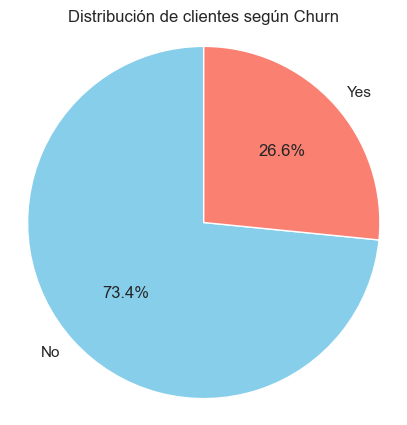


Porcentaje de Churn:
Churn
No     73.0
Yes    27.0
Name: proportion, dtype: float64


In [113]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"
# Conteo de valores únicos en la variable Churn
churn_counts = data['Churn'].value_counts()
#Gráfico
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribución de clientes según Churn')
plt.axis('equal')  # Para que el círculo no se vea ovalado
plt.savefig(os.path.join(output_folder, 'Diagrama Torta de la Variable Churn.png'), dpi=300)
plt.show()
# Porcentaje de clientes con y sin churn
print("\nPorcentaje de Churn:")
print(data['Churn'].value_counts(normalize=True).round(2) * 100)

## 8. Distribución de variables descriptivas
Interpretacion gráfica de los datos corregidos.
### Tenure (meses como cliente)

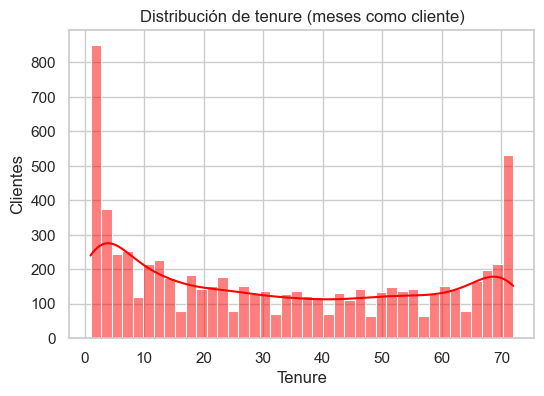

In [114]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"
# Configuración del estilo de gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (6, 4)

sns.histplot(data['tenure'], bins=40, kde=True, color='red')
plt.title('Distribución de tenure (meses como cliente)')
plt.xlabel('Tenure')
plt.ylabel('Clientes')
plt.savefig(os.path.join(output_folder, 'Histograma_Tenure.png'), dpi=300)
plt.show()


### Monthly Charges (cargo mensual)

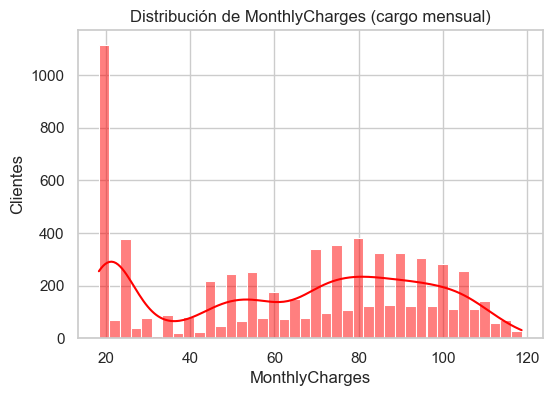

In [115]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data['MonthlyCharges'], bins=40, kde=True, color='red')
plt.title('Distribución de MonthlyCharges (cargo mensual)')
plt.xlabel('MonthlyCharges')
plt.ylabel('Clientes')
plt.savefig(os.path.join(output_folder, 'Histograma_MonthlyCharges.png'), dpi=300)
plt.show()

### SeniorCitizen (Adulto Mayor)

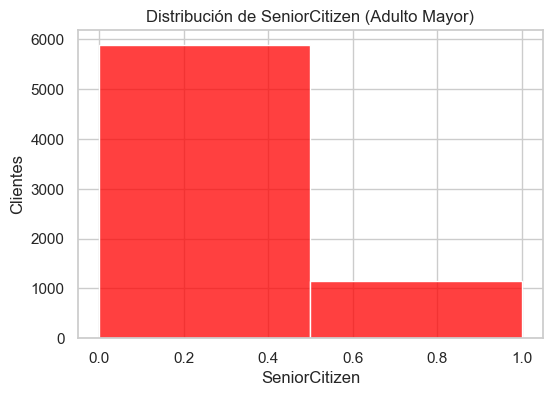

In [116]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data['SeniorCitizen'], bins=2, color='red')
plt.title('Distribución de SeniorCitizen (Adulto Mayor)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Clientes')
plt.savefig(os.path.join(output_folder, 'Histograma_SeniorCitizen.png'), dpi=300)
plt.show()

## 9. Comparación Variables descrptivas Vs Churn  
### Tenure vs Churn

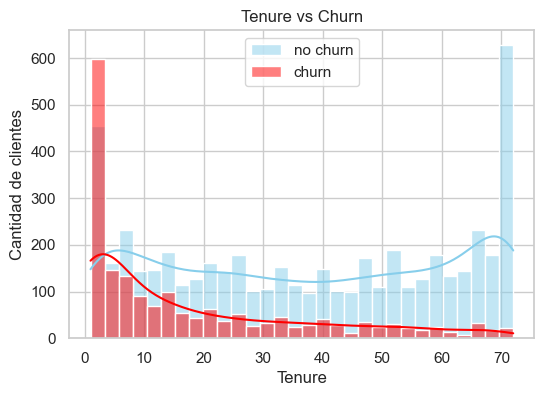


--- Porcentaje de clientes que hacen churn por tenure ---
Churn      No    Yes
tenure              
1       38.01  61.99
2       48.32  51.68
3       53.00  47.00
4       52.84  47.16
5       51.88  48.12
...       ...    ...
68      91.00   9.00
69      91.58   8.42
70      90.76   9.24
71      96.47   3.53
72      98.34   1.66

[72 rows x 2 columns]


In [117]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data=data[data['Churn'] == 'No'], x='tenure', color='skyblue', label='no churn', bins=30, alpha=0.5, kde=True)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='tenure', color='red', label='churn', bins=30, alpha=0.5, kde=True)
plt.title('Tenure vs Churn')
plt.xlabel('Tenure')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_Tenure_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por Tenure
tenure_churn = pd.crosstab(data['tenure'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por tenure ---")
print(tenure_churn.round(2))

### SeniorCitizen vs Churn

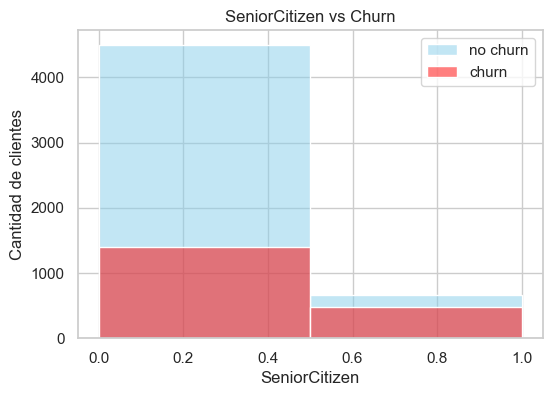


--- Porcentaje de clientes que hacen churn por SeniorCitizen ---
Churn             No    Yes
SeniorCitizen              
0              76.35  23.65
1              58.32  41.68


In [118]:
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data=data[data['Churn'] == 'No'], x='SeniorCitizen', color='skyblue', label='no churn', bins=2, alpha=0.5)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='SeniorCitizen', color='red', label='churn', bins=2, alpha=0.5)
plt.title('SeniorCitizen vs Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_SeniorCitizen_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por SeniorCitizen
SeniorCitizen_churn = pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por SeniorCitizen ---")
print(SeniorCitizen_churn.round(2))

### MonthlyCharges vs Churn

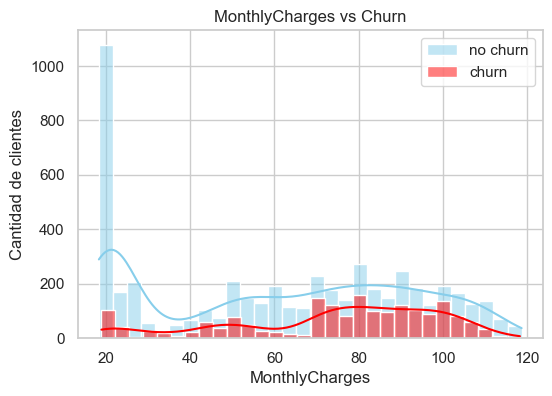


--- Porcentaje de clientes que hacen churn por MonthlyCharges ---
Churn              No    Yes
MonthlyCharges              
18.25           100.0    0.0
18.40           100.0    0.0
18.55           100.0    0.0
18.70           100.0    0.0
18.75           100.0    0.0
...               ...    ...
118.20          100.0    0.0
118.35            0.0  100.0
118.60          100.0    0.0
118.65          100.0    0.0
118.75          100.0    0.0

[1584 rows x 2 columns]


In [119]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data=data[data['Churn'] == 'No'], x='MonthlyCharges', color='skyblue', label='no churn', bins=30, alpha=0.5, kde=True)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='MonthlyCharges', color='red', label='churn', bins=30, alpha=0.5, kde=True)
plt.title('MonthlyCharges vs Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_MonthlyCharges_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por MonthlyCharges
MonthlyCharges_churn = pd.crosstab(data['MonthlyCharges'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por MonthlyCharges ---")
print(MonthlyCharges_churn.round(2))

## Otras Variables Vs Churn

### Contract Vs Churn

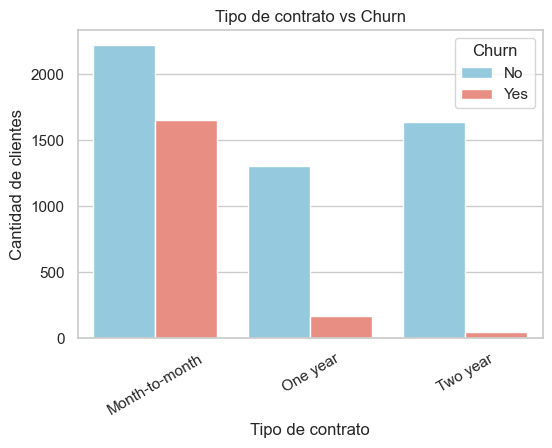


--- Porcentaje de clientes que hacen churn por tipo de contrato ---
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.72  11.28
Two year        97.15   2.85


In [120]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

custom_colors = ['skyblue', 'salmon']
sns.countplot(data=data, x='Contract', hue='Churn', palette=custom_colors)
plt.title('Tipo de contrato vs Churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.savefig(os.path.join(output_folder, 'DiagramadeBarra_Contract_Vs_Churn.png'), dpi=300)
plt.show()

#Porcentaje de churn por tipo de contrato
contract_churn = pd.crosstab(data['Contract'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por tipo de contrato ---")
print(contract_churn.round(2))

### InternetService Vs Churn

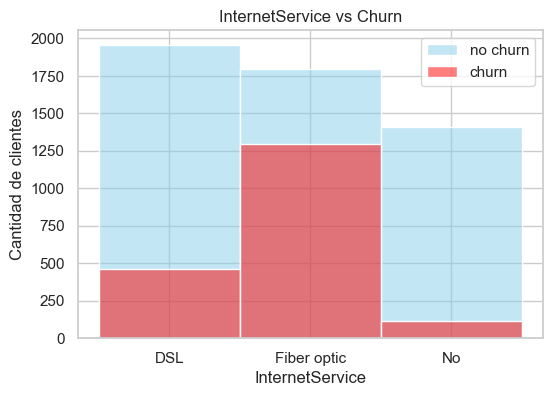


--- Porcentaje de clientes que hacen churn por InternetService ---
Churn               No    Yes
InternetService              
DSL              81.00  19.00
Fiber optic      58.11  41.89
No               92.57   7.43


In [121]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data=data[data['Churn'] == 'No'], x='InternetService', color='skyblue', label='no churn', bins=5, alpha=0.5)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='InternetService', color='red', label='churn', bins=5, alpha=0.5)
plt.title('InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_InternetService_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por InternetService
InternetService_churn = pd.crosstab(data['InternetService'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por InternetService ---")
print(InternetService_churn.round(2))

### PaymentMethod Vs Churn

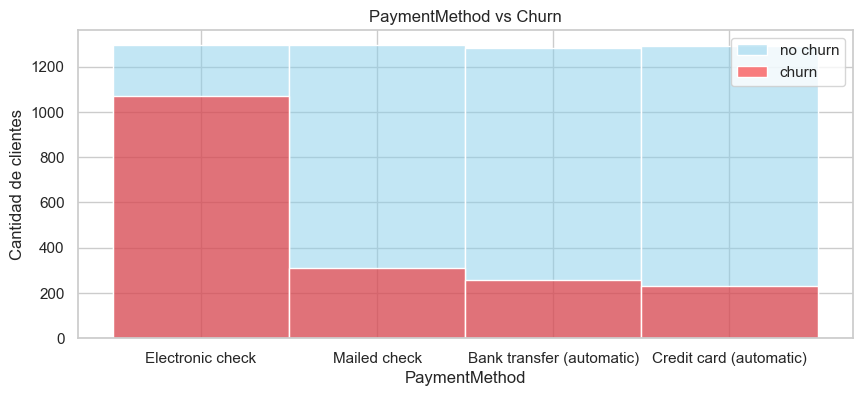


--- Porcentaje de clientes que hacen churn por PaymentMethod ---
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.27  16.73
Credit card (automatic)    84.75  15.25
Electronic check           54.71  45.29
Mailed check               80.80  19.20


In [122]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

plt.figure(figsize=(10,4))
sns.histplot(data=data[data['Churn'] == 'No'], x='PaymentMethod', color='skyblue', label='no churn', bins=90, alpha=0.5)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='PaymentMethod', color='red', label='churn', bins=90, alpha=0.5)
plt.title('PaymentMethod vs Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_PaymentMethod_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por PaymentMethod
PaymentMethod_churn = pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por PaymentMethod ---")
print(PaymentMethod_churn.round(2))

### TotalCharges Vs Churn

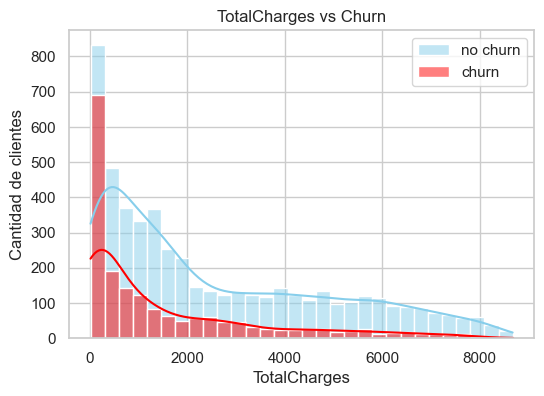


--- Porcentaje de clientes que hacen churn por TotalCharges ---
Churn            No    Yes
TotalCharges              
18.80         100.0    0.0
18.85          50.0   50.0
18.90         100.0    0.0
19.00         100.0    0.0
19.05         100.0    0.0
...             ...    ...
8564.75       100.0    0.0
8594.40       100.0    0.0
8670.10       100.0    0.0
8672.45       100.0    0.0
8684.80         0.0  100.0

[6530 rows x 2 columns]


In [123]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data=data[data['Churn'] == 'No'], x='TotalCharges', color='skyblue', label='no churn', bins=30, alpha=0.5, kde=True)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='TotalCharges', color='red', label='churn', bins=30, alpha=0.5, kde=True)
plt.title('TotalCharges vs Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_TotalCharges_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por TotalCharges
TotalCharges_churn = pd.crosstab(data['TotalCharges'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por TotalCharges ---")
print(TotalCharges_churn.round(2))

### TechSupport Vs Churn

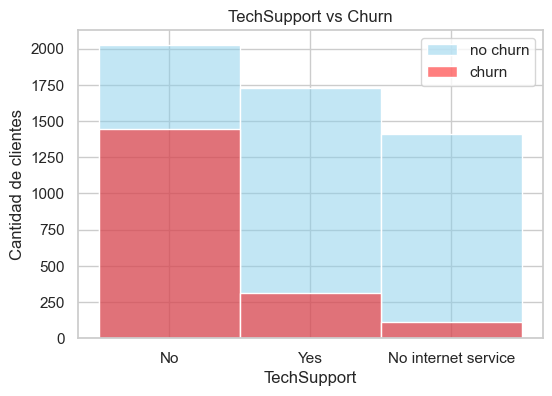


--- Porcentaje de clientes que hacen churn por TechSupport ---
Churn                   No    Yes
TechSupport                      
No                   58.35  41.65
No internet service  92.57   7.43
Yes                  84.80  15.20


In [124]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data=data[data['Churn'] == 'No'], x='TechSupport', color='skyblue', label='no churn', bins=30, alpha=0.5)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='TechSupport', color='red', label='churn', bins=30, alpha=0.5)
plt.title('TechSupport vs Churn')
plt.xlabel('TechSupport')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_TechSupport_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por TechSupport
TechSupport_churn = pd.crosstab(data['TechSupport'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por TechSupport ---")
print(TechSupport_churn.round(2))

### Gender Vs Churn

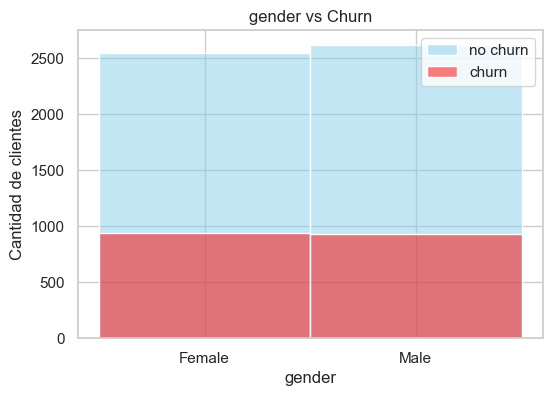


--- Porcentaje de clientes que hacen churn por gender ---
Churn      No    Yes
gender              
Female  73.04  26.96
Male    73.80  26.20


In [125]:
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"

sns.histplot(data=data[data['Churn'] == 'No'], x='gender', color='skyblue', label='no churn', bins=30, alpha=0.5)
sns.histplot(data=data[data['Churn'] == 'Yes'], x='gender', color='red', label='churn', bins=30, alpha=0.5)
plt.title('gender vs Churn')
plt.xlabel('gender')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.savefig(os.path.join(output_folder, 'Histograma_gender_Vs_Churn.png'), dpi=300)
plt.show()
# Porcentaje de churn por TechSupport
gender_churn = pd.crosstab(data['gender'], data['Churn'], normalize='index') * 100
print("\n--- Porcentaje de clientes que hacen churn por gender ---")
print(gender_churn.round(2))

## 10. Correlación entre Variables Númericas  
Se realiza análisis de la relación entre si de las variables numéricas de la data con el fin de detectar variables que podrían ser redundantes o colineales. 

### Mapa de Calor (heatmap)

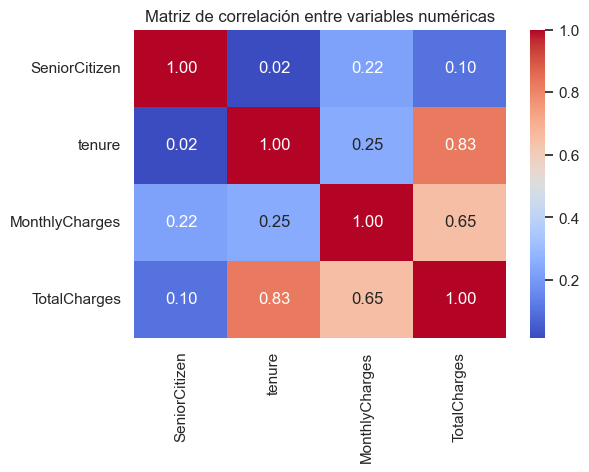


 Conclusión:
- 'TotalCharges' y 'tenure' tienen una alta correlación (~0.83), porque a mayor permanencia, mayor facturación.
- 'MonthlyCharges' está moderadamente correlacionado con 'TotalCharges', pero no con 'tenure'.
- No hay colinealidad fuerte que deba preocupar por el momento.


In [126]:
# Seleccionamos sólo las columnas numéricas del dataframe
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizamos la matriz como un mapa de calor
# Asignamos carpeta para guardar gráficos
output_folder = "../Visuals/exploracion_inicial"
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.savefig(os.path.join(output_folder, 'Diagrama_de_calor_de_matriz_de_correlación.png'), dpi=300)
plt.show()

# Conclusión rápida en texto
print("\n Conclusión:")
print("- 'TotalCharges' y 'tenure' tienen una alta correlación (~0.83), porque a mayor permanencia, mayor facturación.")
print("- 'MonthlyCharges' está moderadamente correlacionado con 'TotalCharges', pero no con 'tenure'.")
print("- No hay colinealidad fuerte que deba preocupar por el momento.")

## 11. Conclusiones de la exploración inicial de la Data

A partir del análisis inicial de la Data "telco_customer-churn.csv, se identificaron hallazgos importante, tales como:

- *Churn moderado (26.6%)*: Aproximadamente 1 de cada 4 clientes cancelan el servicio, lo que sugiere que la data está algo desbalanceada pero no de forma extrema.
- *Tipo de contrato* es un fuerte predictor de churn: los contratos mensuales presentan una tasa de cancelación significativamente mayor.
- *Internet de fibra óptica* está relacionado con mayor churn, posiblemente por expectativas más altas de calidad.
- *Métodos de pago manuales* (como cheque electrónico) tienen mayor probabilidad de cancelación que los automáticos.
- *Clientes con cargos mensuales altos* son más propensos a hacer churn.
- *Clientes con bajos TotalCharges suelen hacer churn*, lo que indica que muchos clientes se van en las primeras etapas.
- La matriz de correlación muestra una relación fuerte entre tenure y TotalCharges, lo que es lógico ya que los clientes antiguos acumulan más facturación.
- No se encontraron problemas graves de multicolinealidad entre variables numéricas.

---

Estos resultados sientan una base sólida para comenzar el proceso de preprocesamiento, selección de variables y entrenamiento de modelos predictivos.